In [ ]:
'''The core assumption of Naive Bayes is that all features are conditionally independent given the class label.

GaussianNB assumes features follow a normal distribution and is used for continuous data, MultinomialNB is suited for count-based data like word frequencies, and BernoulliNB works with binary features indicating presence or absence.

Naive Bayes is suitable for high-dimensional data because its independence assumption simplifies computations, making the model efficient and less prone to overfitting in such settings.'''

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

df = pd.read_csv("Biomes.csv")
df = df.dropna(subset=['name', 'precipitation'])

df['precipitation'] = df['precipitation'].astype('category')
df['tag'] = df['precipitation'].cat.codes

t = df['name']
l = df['tag']

a, b, c, d = train_test_split(t, l, test_size=0.2, random_state=42)

v = CountVectorizer()
a1 = v.fit_transform(a)
b1 = v.transform(b)

m = MultinomialNB()
m.fit(a1, c)
r = m.predict(b1)

ac = accuracy_score(d, r)
pr = precision_score(d, r, average='macro')
re = recall_score(d, r, average='macro')
cm = confusion_matrix(d, r)

print("Accuracy:", round(ac, 4))
print("Precision:", round(pr, 4))
print("Recall:", round(re, 4))
print("Confusion Matrix:\n", cm)


Accuracy: 0.9
Precision: 0.45
Recall: 0.5
Confusion Matrix:
 [[9 0]
 [1 0]]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [24]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

d = load_iris()
x = pd.DataFrame(d.data, columns=d.feature_names)
y = pd.Series(d.target)

xa, xb, ya, yb = train_test_split(x, y, test_size=0.2, random_state=42)

nb = GaussianNB()
lr = LogisticRegression(max_iter=200)
dt = DecisionTreeClassifier(random_state=42)

nb.fit(xa, ya)
lr.fit(xa, ya)
dt.fit(xa, ya)

p1 = nb.predict(xb)
p2 = lr.predict(xb)
p3 = dt.predict(xb)

print("GaussianNB Accuracy:", round(accuracy_score(yb, p1), 4))
print("LogisticReg Accuracy:", round(accuracy_score(yb, p2), 4))
print("DecisionTree Accuracy:", round(accuracy_score(yb, p3), 4))


GaussianNB Accuracy: 1.0
LogisticReg Accuracy: 1.0
DecisionTree Accuracy: 1.0


In [ ]:
'''Entropy measures the impurity or randomness in a dataset. Lower entropy means more pure (homogeneous) data.

Information Gain is the reduction in entropy after splitting the data based on a feature. It helps in choosing the best attribute for a decision tree node.

'''
'''Entropy uses a logarithmic formula and can be more computationally intensive.
Gini Index is simpler, measuring impurity as 
1−∑𝑝^2, and tends to favor larger partitions.
Both are used to select features in decision trees, but Gini is slightly faster and often preferred in practice.
'''
'''A decision tree overfits when it grows too deep and learns noise or very specific patterns from the training data.
To avoid overfitting, limit tree depth (max_depth), set a minimum number of samples to split (min_samples_split), or use pruning techniques.'''

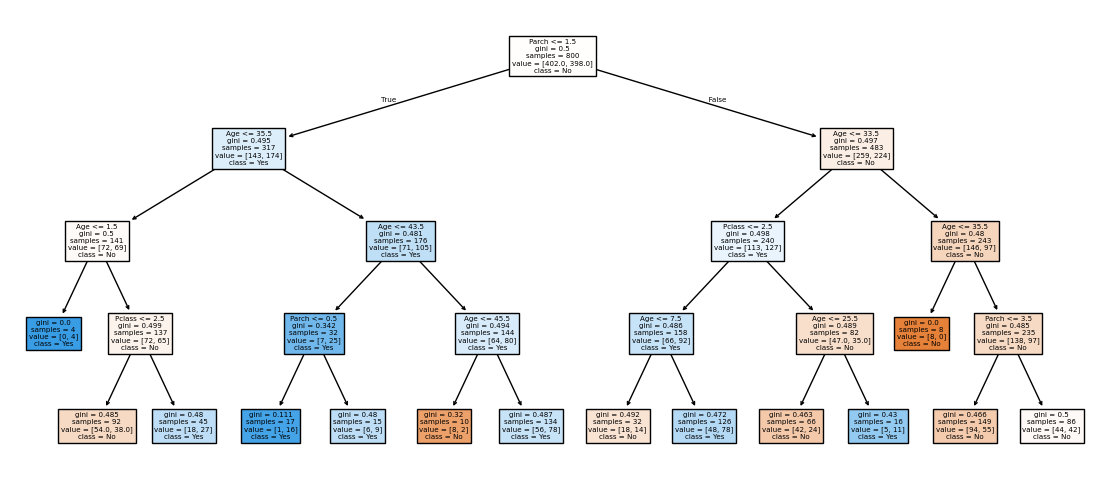

Accuracy: 0.545
Confusion Matrix:
 [[64 42]
 [49 45]]


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix

d = pd.read_csv("Titanic.csv")
d = d[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']]

d['Age'] = d['Age'].fillna(d['Age'].median())
d['Embarked'] = d['Embarked'].fillna(d['Embarked'].mode()[0])

le1 = LabelEncoder()
le2 = LabelEncoder()
d['Sex'] = le1.fit_transform(d['Sex'])
d['Embarked'] = le2.fit_transform(d['Embarked'])

x = d.drop('Survived', axis=1)
y = d['Survived']
xa, xb, ya, yb = train_test_split(x, y, test_size=0.2, random_state=42)

m = DecisionTreeClassifier(max_depth=4, random_state=42)
m.fit(xa, ya)

plt.figure(figsize=(14, 6))
plot_tree(m, feature_names=x.columns, class_names=['No', 'Yes'], filled=True)
plt.show()

p = m.predict(xb)
print("Accuracy:", round(accuracy_score(yb, p), 4))
print("Confusion Matrix:\n", confusion_matrix(yb, p))


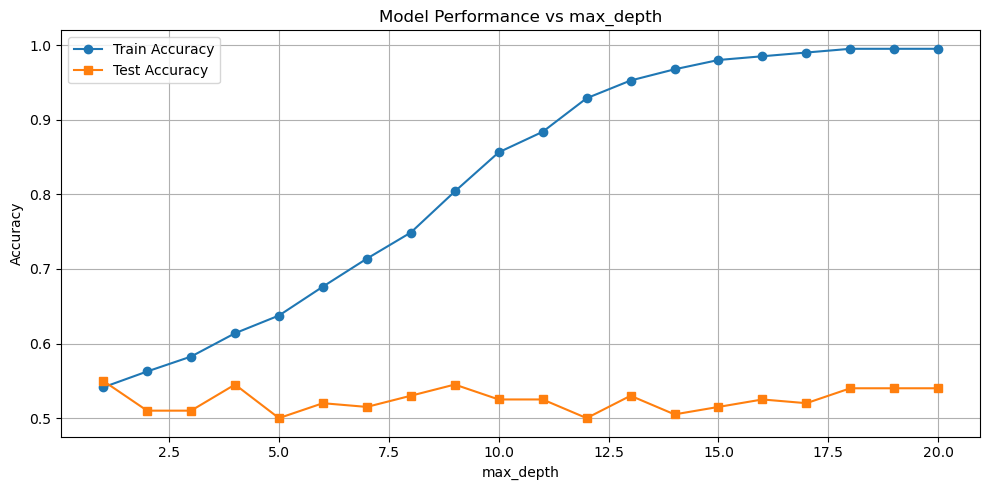

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

d = pd.read_csv("Titanic.csv")
d = d[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']]

d['Age'] = d['Age'].fillna(d['Age'].median())
d['Embarked'] = d['Embarked'].fillna(d['Embarked'].mode()[0])

le1 = LabelEncoder()
le2 = LabelEncoder()
d['Sex'] = le1.fit_transform(d['Sex'])
d['Embarked'] = le2.fit_transform(d['Embarked'])

x = d.drop('Survived', axis=1)
y = d['Survived']
xa, xb, ya, yb = train_test_split(x, y, test_size=0.2, random_state=42)

depths = range(1, 21)
train_acc = []
test_acc = []

for dep in depths:
    m = DecisionTreeClassifier(max_depth=dep, min_samples_split=2, random_state=42)
    m.fit(xa, ya)
    p_train = m.predict(xa)
    p_test = m.predict(xb)
    train_acc.append(accuracy_score(ya, p_train))
    test_acc.append(accuracy_score(yb, p_test))

plt.figure(figsize=(10, 5))
plt.plot(depths, train_acc, label='Train Accuracy', marker='o')
plt.plot(depths, test_acc, label='Test Accuracy', marker='s')
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.title("Model Performance vs max_depth")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
'''Bagging vs Boosting:

Bagging (Bootstrap Aggregating) trains multiple models independently in parallel on random subsets of data and averages their predictions to reduce variance.

Boosting trains models sequentially, where each new model focuses on correcting the errors of the previous ones, aiming to reduce bias.

How Random Forest reduces variance:

Random Forest reduces variance by averaging the predictions of many uncorrelated decision trees, each trained on different bootstrap samples and random feature subsets, making the overall model more robust and less prone to overfitting.

Weakness of Boosting-based methods:

Boosting can be prone to overfitting, especially if the data is noisy. It's also more computationally intensive and less interpretable compared to simpler ensemble methods like bagging.
'''

Decision Tree
Accuracy: 0.54
Precision: 0.5091
Recall: 0.5957
------------------------------
Random Forest
Accuracy: 0.52
Precision: 0.4898
Recall: 0.5106
------------------------------


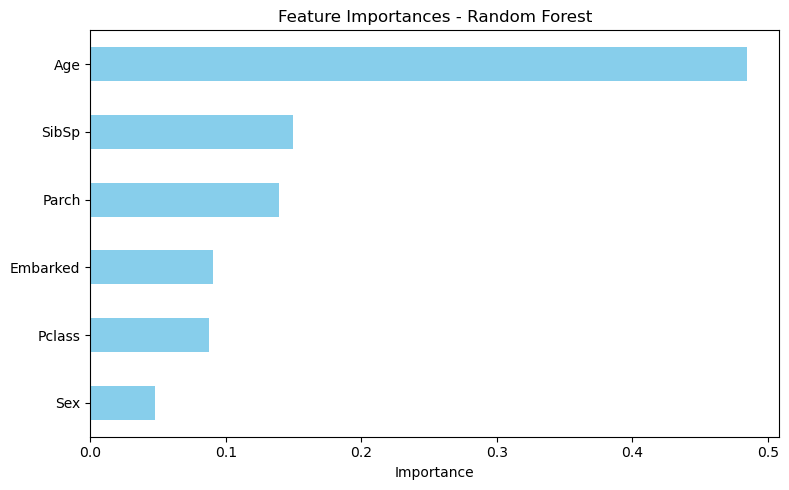

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
d = pd.read_csv("Titanic.csv")
d = d[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']]

d['Age'] = d['Age'].fillna(d['Age'].median())
d['Embarked'] = d['Embarked'].fillna(d['Embarked'].mode()[0])

le1 = LabelEncoder()
le2 = LabelEncoder()
d['Sex'] = le1.fit_transform(d['Sex'])
d['Embarked'] = le2.fit_transform(d['Embarked'])

x = d.drop('Survived', axis=1)
y = d['Survived']
xa, xb, ya, yb = train_test_split(x, y, test_size=0.2, random_state=42)
dt = DecisionTreeClassifier(random_state=42)
dt.fit(xa, ya)
pdt = dt.predict(xb)
rf = RandomForestClassifier(random_state=42)
rf.fit(xa, ya)
prf = rf.predict(xb)
def show_scores(name, yt, yp):
    acc = accuracy_score(yt, yp)
    pre = precision_score(yt, yp)
    rec = recall_score(yt, yp)
    print(f"{name}")
    print("Accuracy:", round(acc, 4))
    print("Precision:", round(pre, 4))
    print("Recall:", round(rec, 4))
    print("-" * 30)

show_scores("Decision Tree", yb, pdt)
show_scores("Random Forest", yb, prf)
plt.figure(figsize=(8, 5))
feat = pd.Series(rf.feature_importances_, index=x.columns)
feat.sort_values().plot(kind='barh', color='skyblue')
plt.title("Feature Importances - Random Forest")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()


In [31]:
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score

d = pd.read_csv("Titanic.csv")
d = d[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']]

d['Age'] = d['Age'].fillna(d['Age'].median())
d['Embarked'] = d['Embarked'].fillna(d['Embarked'].mode()[0])

e1 = LabelEncoder()
e2 = LabelEncoder()
d['Sex'] = e1.fit_transform(d['Sex'])
d['Embarked'] = e2.fit_transform(d['Embarked'])

x = d.drop('Survived', axis=1)
y = d['Survived']
xa, xb, ya, yb = train_test_split(x, y, test_size=0.2, random_state=42)

def f(m, n):
    s = time.time()
    m.fit(xa, ya)
    e = time.time()
    yp = m.predict(xb)
    a = accuracy_score(yb, yp)
    f1 = f1_score(yb, yp)
    print(n)
    print("Accuracy:", round(a, 4))
    print("F1-score:", round(f1, 4))
    print("Training Time:", round(e - s, 4), "sec")
    print("-" * 30)

m1 = DecisionTreeClassifier(random_state=42)
m2 = RandomForestClassifier(random_state=42)
m3 = AdaBoostClassifier(random_state=42)
m4 = GradientBoostingClassifier(random_state=42)

f(m1, "Decision Tree")
f(m2, "Random Forest")
f(m3, "AdaBoost")
f(m4, "Gradient Boosting")


Decision Tree
Accuracy: 0.54
F1-score: 0.549
Training Time: 0.0157 sec
------------------------------
Random Forest
Accuracy: 0.52
F1-score: 0.5
Training Time: 0.4738 sec
------------------------------
AdaBoost
Accuracy: 0.585
F1-score: 0.5414
Training Time: 0.2058 sec
------------------------------
Gradient Boosting
Accuracy: 0.545
F1-score: 0.5381
Training Time: 0.448 sec
------------------------------
